In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


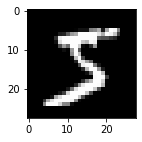

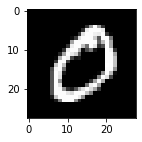

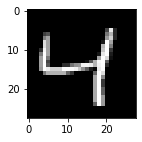

In [3]:
for n in range(0,3):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[n], cmap= "gray")

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

In [6]:
model = Sequential()

model.add(Flatten(input_shape= (28, 28)))
model.add(Dense(units= 128, kernel_initializer = "uniform", activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units= 128, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation= "softmax"))

model.compile(metrics=["accuracy"], optimizer= "adam", loss= "sparse_categorical_crossentropy")

In [7]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3241 - accuracy: 0.9039 - val_loss: 0.1452 - val_accuracy: 0.9550
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1498 - accuracy: 0.9540 - val_loss: 0.1056 - val_accuracy: 0.9661
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9653 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0952 - accuracy: 0.9700 - val_loss: 0.0856 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9742 - val_loss: 0.0845 - val_accuracy: 0.9743
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9770 - val_loss: 0.0836 - val_accuracy: 0.9753
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.0833 - val_accuracy:

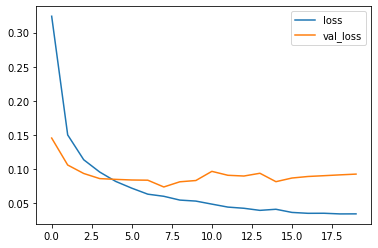

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

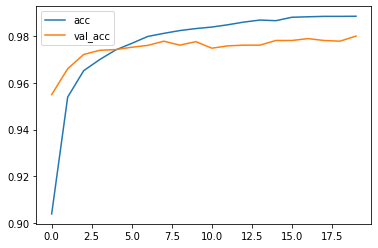

In [9]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9801
[0.09222311526536942, 0.9800999760627747]


Confusion matrix, without normalization
[[ 972    0    1    0    0    1    2    2    1    1]
 [   0 1126    4    1    0    0    2    0    2    0]
 [   6    0 1010    3    2    0    1    8    2    0]
 [   0    0    5  983    1   11    0    4    2    4]
 [   1    0    0    0  956    0    5    4    2   14]
 [   3    0    0    5    0  877    1    1    4    1]
 [   4    2    1    0    3    5  942    0    1    0]
 [   1    2    9    1    0    0    0 1008    1    6]
 [   5    2    3    5    4    7    1    4  936    7]
 [   1    3    0    0    5    4    0    4    1  991]]


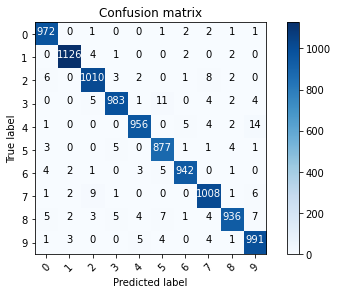

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

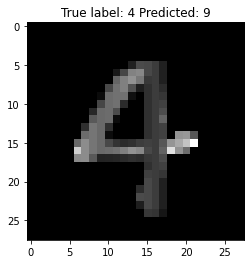

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));